KNN with MKL optimization:
Predicted labels: [1 0]
Time taken: 0.004011392593383789


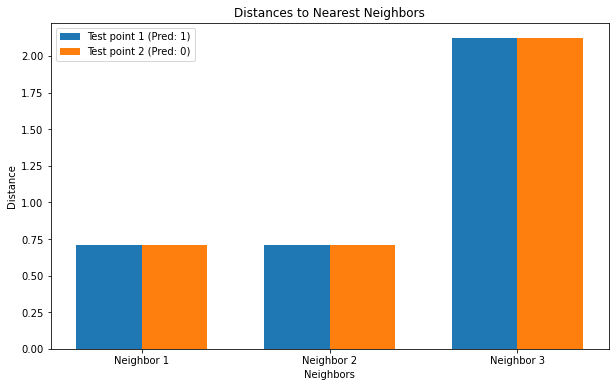

In [33]:
import numpy as np
from scipy.spatial.distance import cdist
from time import time
import matplotlib.pyplot as plt

# Define a different dataset for demonstration
train_data = np.array([[2, 1], [3, 2], [4, 3], [5, 4], [6, 5]])
train_labels = np.array([1, 1, 0, 0, 0])  # Labels corresponding to train_data
test_data = np.array([[3.5, 2.5], [5.5, 4.5]])

# Define K-Nearest Neighbors function with Intel MKL optimization
def knn_with_mkl(train_data, train_labels, test_data, num_neighbors):
    start_time = time()
    # Compute distances between test points and training points
    distances = cdist(test_data, train_data, 'euclidean')
    # Find num_neighbors nearest neighbors for each test point
    nearest_indices = np.argsort(distances, axis=1)[:, :num_neighbors]
    nearest_labels = train_labels[nearest_indices]
    # Predict labels based on majority vote
    predicted_labels = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=nearest_labels)
    end_time = time()
    time_taken = end_time - start_time
    return predicted_labels, time_taken, distances, nearest_indices

# Set num_neighbors for KNN
num_neighbors = 3

# Run KNN with MKL optimization
predicted_labels, time_taken, distances, nearest_indices = knn_with_mkl(train_data, train_labels, test_data, num_neighbors)

# Print results
print("KNN with MKL optimization:")
print("Predicted labels:", predicted_labels)
print("Time taken:", time_taken)

# Plotting bar graph of distances for each test point
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(num_neighbors)

for i, point in enumerate(test_data):
    # Get distances to the num_neighbors nearest neighbors for the current test point
    dists = distances[i, nearest_indices[i]]
    # Plot bar graph for the current test point
    ax.bar(index + i * bar_width, dists, bar_width, label=f'Test point {i+1} (Pred: {predicted_labels[i]})')

# Add labels and legend
ax.set_xlabel('Neighbors')
ax.set_ylabel('Distance')
ax.set_title('Distances to Nearest Neighbors')
ax.set_xticks(index + bar_width / 2 * (len(test_data) - 1))
ax.set_xticklabels([f'Neighbor {i+1}' for i in range(num_neighbors)])
ax.legend()

plt.show()